In [44]:
#imports 
import os
os.chdir('/Users/peytonhall/Documents/qbio_490_pbhall/analysis_data')
import cptac
import numpy as np # support for arrays and vectorized operations
import pandas as pd # support for DataFrames and Series
import matplotlib.pyplot as plt # main graphing library

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
wine = datasets.load_wine()
diabetes = datasets.load_diabetes()

Text(0.5, 1.0, 'Scaled Data')

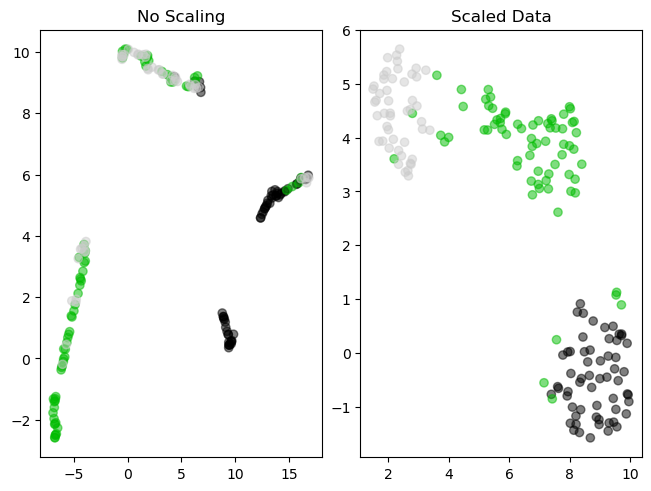

In [5]:
#scaling
from sklearn.preprocessing import StandardScaler
from umap import UMAP
fix, axs = plt.subplots(1, 2, constrained_layout=True)

scaler = StandardScaler()

embedding_unscaled = UMAP().fit_transform(wine.data)

scaled_data = scaler.fit_transform(wine.data)
embedding_scaled = UMAP().fit_transform(scaled_data)

axs[0].scatter(embedding_unscaled[:, 0], embedding_unscaled[:, 1], c=wine.target, alpha=0.5, cmap='nipy_spectral')
axs[0].set_title('No Scaling')

axs[1].scatter(embedding_scaled[:, 0], embedding_scaled[:, 1], c=wine.target, alpha=0.5, cmap='nipy_spectral')
axs[1].set_title('Scaled Data')

In [23]:
#encoding

from sklearn.preprocessing import OrdinalEncoder

random_categorical = pd.DataFrame(
    {
    'gender' : ['male', 'male', 'female', 'male', 'female'],
    'smoking_status' : ['yes', 'no', 'yes', 'yes', 'no'],
    'age' : [36, 24, 57, 24, 13]
    }
)

random_categorical # sample dataset with categorical data

encoder = OrdinalEncoder()
unencoded_columns = random_categorical.loc[:, ['gender', 'smoking_status']]
encoded_columns = encoder.fit_transform(unencoded_columns)
random_categorical.loc[:, ['gender', 'smoking_status']] = encoded_columns

random_categorical

original_columns = encoder.inverse_transform(random_categorical.loc[:, ['gender', 'smoking_status']])
random_categorical.loc[:, ['gender', 'smoking_status']] = original_columns

random_categorical

,gender,smoking_status,age
0,male,yes,36
1,male,no,24
2,female,yes,57
3,male,yes,24
4,female,no,13


Text(0.5, 0.98, 'Comparing Length and Width Between Sepals and Petals')

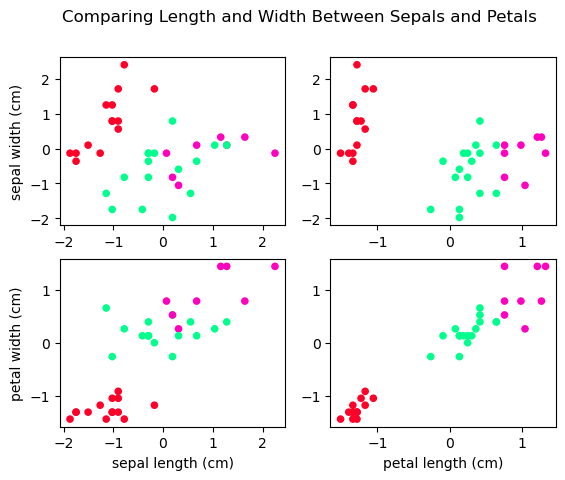

In [30]:
#exercise 1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()

unscaled_data = iris.data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris.data)

classifier = MLPClassifier()

X_train, X_test, y_train, y_test = train_test_split(scaled_data, iris.target, train_size=0.75)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#visualize
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)

iris_df = pd.DataFrame(X_test)

axs[0][0].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')
axs[0][0].set_ylabel('sepal width (cm)')

axs[0][1].scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')

axs[1][0].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][0].set_xlabel('sepal length (cm)')
axs[1][0].set_ylabel('petal width (cm)')

axs[1][1].scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][1].set_xlabel('petal length (cm)')

fig.suptitle('Comparing Length and Width Between Sepals and Petals')

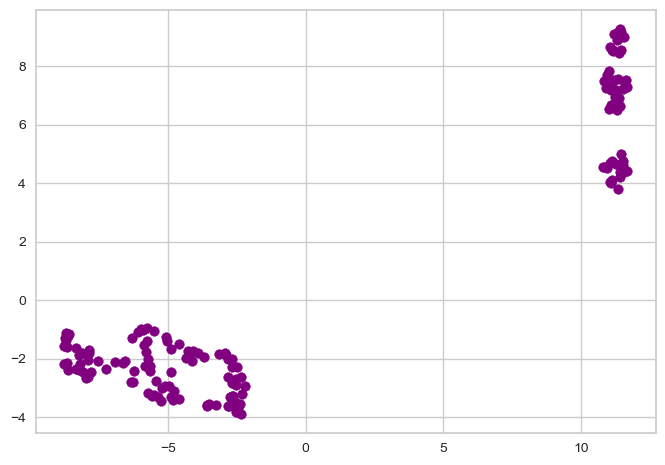

In [25]:
#exercise 2
# Step 1) Dimensionality Reduction
from umap import UMAP

reducer = UMAP()

embedding = reducer.fit_transform(scaled_data)

plt.scatter(embedding[:, 0], embedding[:, 1], color='purple')


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

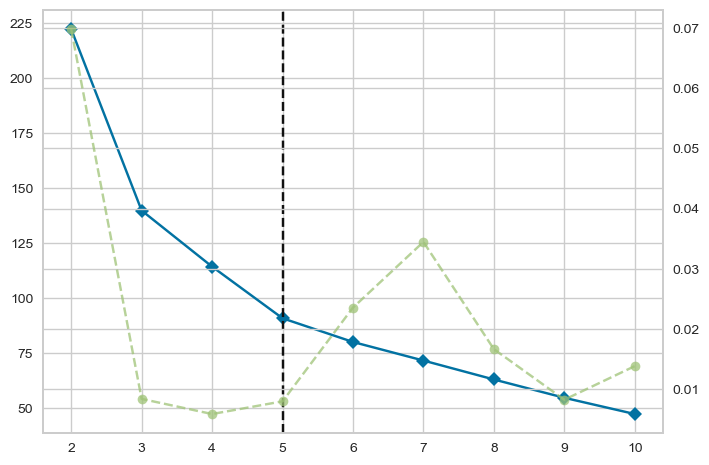

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

iris = datasets.load_iris()

unscaled_data = iris.data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris.data)

visualizer = KElbowVisualizer(KMeans())
visualizer.fit(scaled_data)


Text(0.5, 1.0, 'Actual Labels')

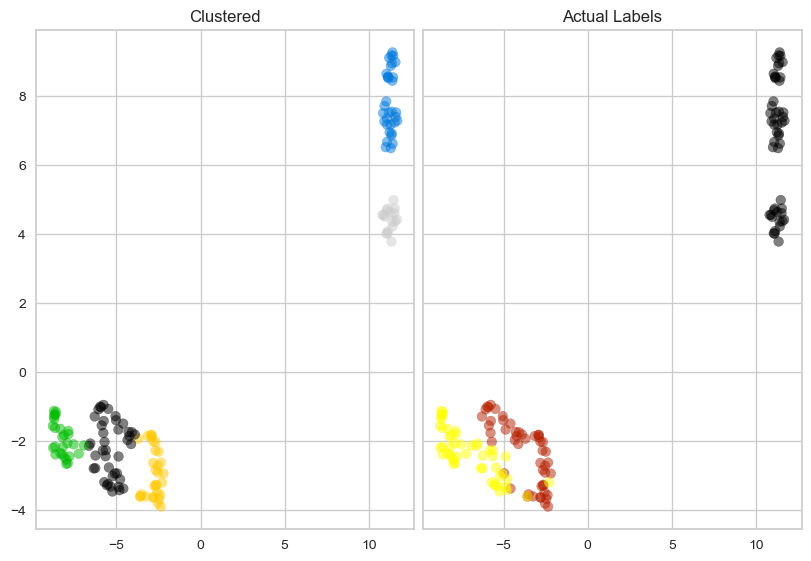

In [27]:
cluster_model = KMeans(n_clusters = 5)

labels = cluster_model.fit_predict(embedding)

fig, axs = plt.subplots(1, 2, constrained_layout=True, sharey=True)

axs[0].scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='nipy_spectral', alpha=0.5)
axs[0].set_title('Clustered')
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=iris.target, cmap='gnuplot', alpha=0.5)
axs[1].set_title('Actual Labels')

In [28]:
print(np.__version__)

1.25.0


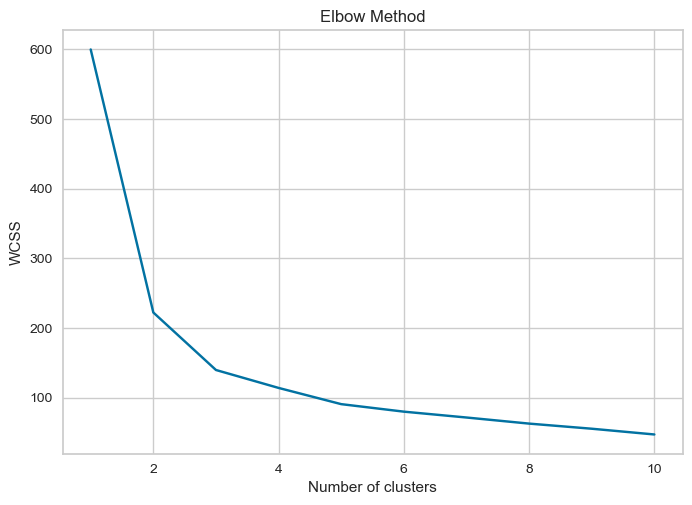

In [29]:
# elbow plot method 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris.data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [25]:
#preprocess
dermatology = pd.read_csv('/Users/peytonhall/Documents/qbio_490_pbhall/dermatology.csv')

derm_mask = dermatology[dermatology.columns[33]] != "?"
derm_cleaned = dermatology.loc[derm_mask,:]

derm_data = derm_cleaned.drop(columns = derm_cleaned.columns[34])

derm_target = derm_cleaned[derm_cleaned.columns[34]]

In [98]:
derm_data

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.18,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8
1,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26
2,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40
3,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45
4,2,3,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,25
361,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,36
362,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,28
363,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,50


Text(0.5, 1.0, 'Scaled Data')

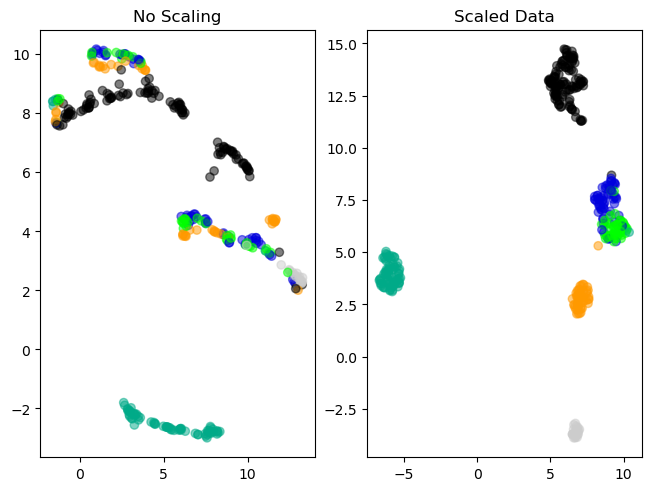

In [28]:
#scale
fix, axs = plt.subplots(1, 2, constrained_layout=True)

scaler = StandardScaler()

embedding_unscaled = UMAP().fit_transform(derm_data)

scaled_data = scaler.fit_transform(derm_data)
embedding_scaled = UMAP().fit_transform(scaled_data)

axs[0].scatter(embedding_unscaled[:, 0], embedding_unscaled[:, 1], c=derm_target, alpha=0.5, cmap='nipy_spectral')
axs[0].set_title('No Scaling')

axs[1].scatter(embedding_scaled[:, 0], embedding_scaled[:, 1], c=derm_target, alpha=0.5, cmap='nipy_spectral')
axs[1].set_title('Scaled Data')


In [31]:
derm_target 
pd.DataFrame(derm_data)
X_train, X_test, y_train, y_test = train_test_split(derm_data, derm_target, train_size=0.75)
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(267, 34)
(90, 34)
(267,)
(90,)


In [33]:
#classification 
from sklearn.neighbors import KNeighborsClassifier # default number of neighbors looked at is 5
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [52]:
derm_data

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.18,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8
1,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26
2,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40
3,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45
4,2,3,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,25
361,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,36
362,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,28
363,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,50


In [56]:
intermediate = X_test.to_numpy()
intermediate

array([[2, 0, 1, ..., 2, 2, '60'],
       [1, 2, 2, ..., 1, 0, '55'],
       [2, 1, 0, ..., 1, 0, '16'],
       ...,
       [3, 2, 2, ..., 3, 0, '35'],
       [2, 2, 2, ..., 0, 0, '75'],
       [0, 1, 0, ..., 3, 0, '51']], dtype=object)

In [60]:
#KNeighborsClassifier 
classifier = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(derm_data, derm_target, train_size=0.75)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test.to_numpy()) 


In [61]:
accuracy = sum(y_pred == y_test) / len(y_test)
accuracy

0.8222222222222222

Text(0.5, 0.98, 'Comparing Different Clinical Attributes')

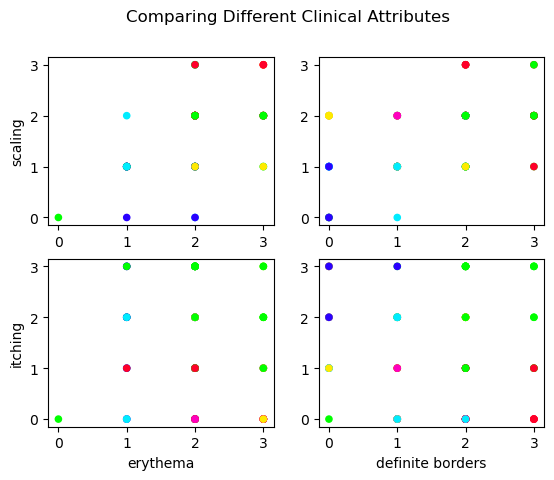

In [64]:
#visualize
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)

derm_df = pd.DataFrame(X_test)

axs[0][0].scatter(derm_df.iloc[:, 0], derm_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')
axs[0][0].set_ylabel('scaling')

axs[0][1].scatter(derm_df.iloc[:, 2], derm_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')

axs[1][0].scatter(derm_df.iloc[:, 0], derm_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][0].set_xlabel('erythema')
axs[1][0].set_ylabel('itching')

axs[1][1].scatter(derm_df.iloc[:, 2], derm_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][1].set_xlabel('definite borders')

fig.suptitle('Comparing Different Clinical Attributes')

In [65]:
#DecisionTreeClassifier
classifier = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(derm_data, derm_target, train_size=0.75)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [66]:
accuracy = sum(y_pred == y_test) / len(y_test)
accuracy

0.8888888888888888

Text(0.5, 0.98, 'Comparing Different Clinical Attributes')

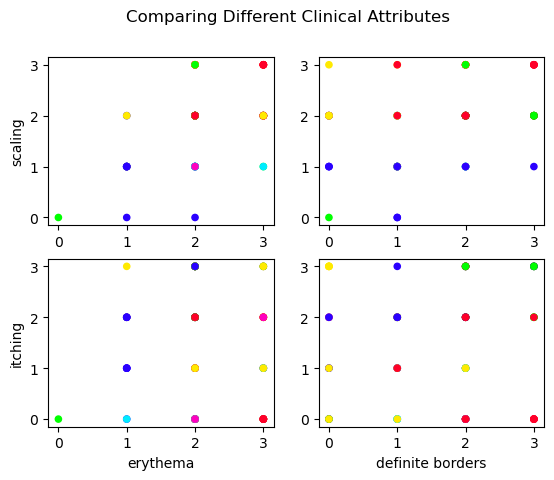

In [67]:
#visualize
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)

derm_df = pd.DataFrame(X_test)

axs[0][0].scatter(derm_df.iloc[:, 0], derm_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')
axs[0][0].set_ylabel('scaling')

axs[0][1].scatter(derm_df.iloc[:, 2], derm_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')

axs[1][0].scatter(derm_df.iloc[:, 0], derm_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][0].set_xlabel('erythema')
axs[1][0].set_ylabel('itching')

axs[1][1].scatter(derm_df.iloc[:, 2], derm_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][1].set_xlabel('definite borders')

fig.suptitle('Comparing Different Clinical Attributes')

In [68]:
#MLP classifier 
classifier = MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(derm_data, derm_target, train_size=0.75)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [69]:
accuracy = sum(y_pred == y_test) / len(y_test)
accuracy

0.9444444444444444

Text(0.5, 0.98, 'Comparing Different Clinical Attributes')

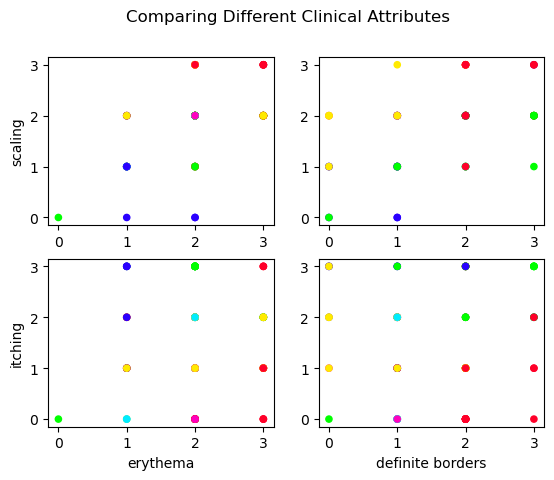

In [70]:
#visualize
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)

derm_df = pd.DataFrame(X_test)

axs[0][0].scatter(derm_df.iloc[:, 0], derm_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')
axs[0][0].set_ylabel('scaling')

axs[0][1].scatter(derm_df.iloc[:, 2], derm_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')

axs[1][0].scatter(derm_df.iloc[:, 0], derm_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][0].set_xlabel('erythema')
axs[1][0].set_ylabel('itching')

axs[1][1].scatter(derm_df.iloc[:, 2], derm_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][1].set_xlabel('definite borders')

fig.suptitle('Comparing Different Clinical Attributes')

In [71]:
#regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge



In [109]:
scaler = StandardScaler()
derm_new_data = derm_cleaned.drop(columns = derm_cleaned.columns[33])
scaled_data = scaler.fit_transform(derm_new_data)
derm_new_target = derm_cleaned[derm_cleaned.columns[33]]
derm_new_target = derm_new_target.astype(float)

regressors_names = [
    'Linear', 
    'Nearest Neighbors', 
    'Stochastic Gradient Descent', 
    'Support Vector',
    'Bayesian Ridge'
]

regressors = [
    LinearRegression(),
    KNeighborsRegressor(),
    SGDRegressor(),
    SVR(),
    BayesianRidge()
]

regressors_perf = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: []
}

for n in range(1):
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, derm_new_target, train_size=0.8)
    for i in range(len(regressors)):
        model = regressors[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # print(y_pred)
        # print((y_test.astype(float)).to_numpy())
        
        difference = y_pred - y_test
        # difference = y_pred - (y_test.astype(float)).to_numpy()

        regressors_perf[i].append(abs(np.mean(difference)))
        
print('\nAfter 1 simulations, the average error for each regressor is as follows:')
for i in regressors_perf:
    print(f'\t{regressors_names[i]} : {np.mean(regressors_perf[i])}')


After 1 simulations, the average error for each regressor is as follows:
	Linear : 0.6666309604144504
	Nearest Neighbors : 0.29444444444444423
	Stochastic Gradient Descent : 0.7966684720822624
	Support Vector : 0.0004944822747735679
	Bayesian Ridge : 0.932183852569016


In [107]:
X_test

array([[-0.11796822,  0.27553309,  1.58938378, ..., -1.26050554,
         2.2027703 ,  0.13536256],
       [-0.11796822, -1.15005116, -0.6401251 , ...,  0.172617  ,
        -0.50580259,  0.76295259],
       [-0.11796822,  0.27553309,  0.47462934, ..., -1.26050554,
        -0.50580259, -1.11981751],
       ...,
       [-0.11796822,  1.70111735,  1.58938378, ..., -1.26050554,
        -0.50580259, -1.11981751],
       [-0.11796822,  0.27553309,  0.47462934, ...,  0.172617  ,
        -0.50580259,  0.76295259],
       [-0.11796822,  0.27553309,  0.47462934, ...,  0.172617  ,
        -0.50580259, -1.11981751]])

In [102]:
derm_new_target.astype(float)

0       8.0
1      26.0
2      40.0
3      45.0
4      41.0
       ... 
360    25.0
361    36.0
362    28.0
363    50.0
364    35.0
Name: 55, Length: 357, dtype: float64

ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 357.

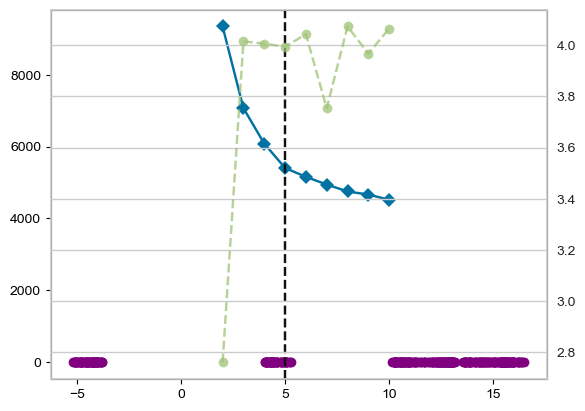

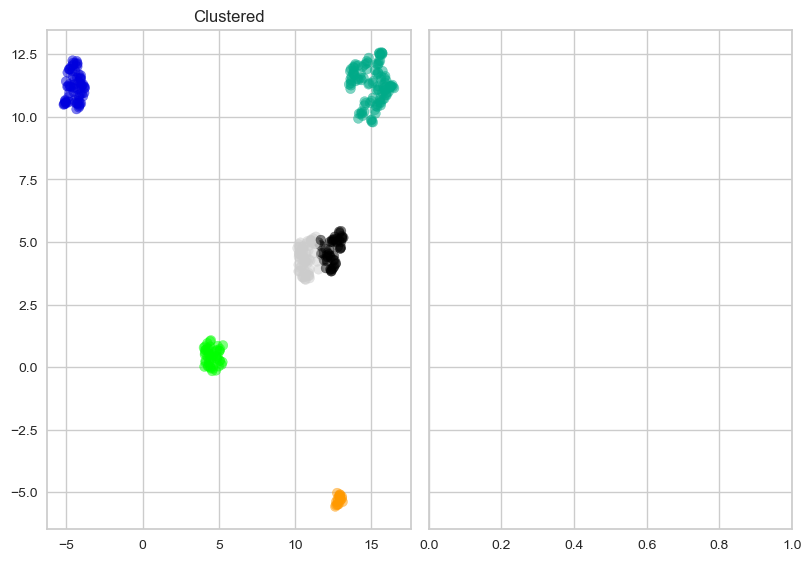

In [110]:
#unsupervised 
# Step 1) Dimensionality Reduction
from umap import UMAP
reducer = UMAP()
embedding = reducer.fit_transform(scaled_data)
plt.scatter(embedding[:, 0], embedding[:, 1], color='purple')

# Step 2) Determination of # of Clusters for KMeans()
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans())
visualizer.fit(scaled_data)

# Step 3) KMeans Clustering
cluster_model = KMeans(n_clusters = 6)

labels = cluster_model.fit_predict(embedding)

fig, axs = plt.subplots(1, 2, constrained_layout=True, sharey=True)

axs[0].scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='nipy_spectral', alpha=0.5)
axs[0].set_title('Clustered')
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=iris.target, cmap='gnuplot', alpha=0.5)
axs[1].set_title('Actual Labels')

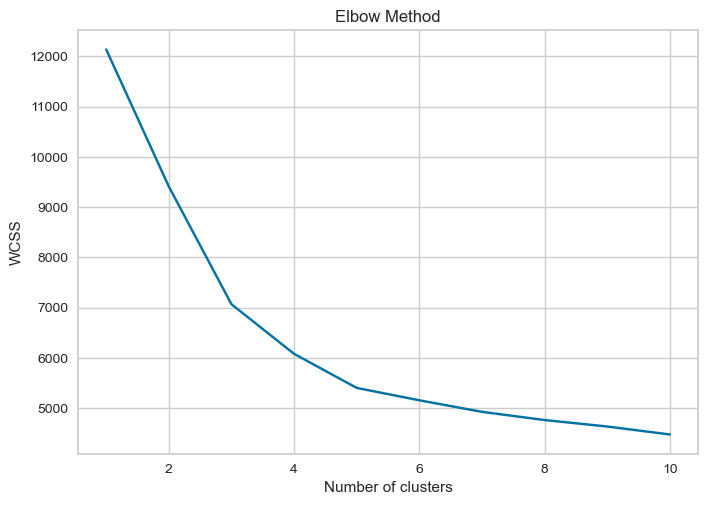

In [111]:
#elbow plot
# elbow plot method 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(derm_new_data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

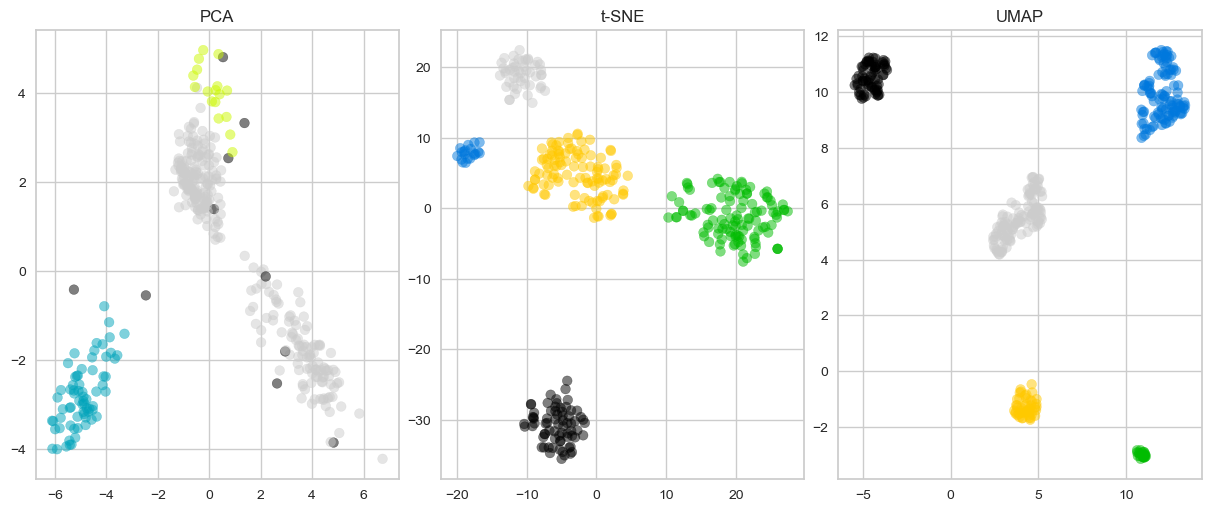

In [114]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from hdbscan import HDBSCAN

#HDBSCAN

plt.rcParams['figure.figsize'] = [12, 5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(derm_new_data)

cluster_model = HDBSCAN()

reducers = [
    PCA(),
    TSNE(),
    UMAP()
]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    labels = cluster_model.fit_predict(embedding)
    axs[i].scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(reducers_names[i])

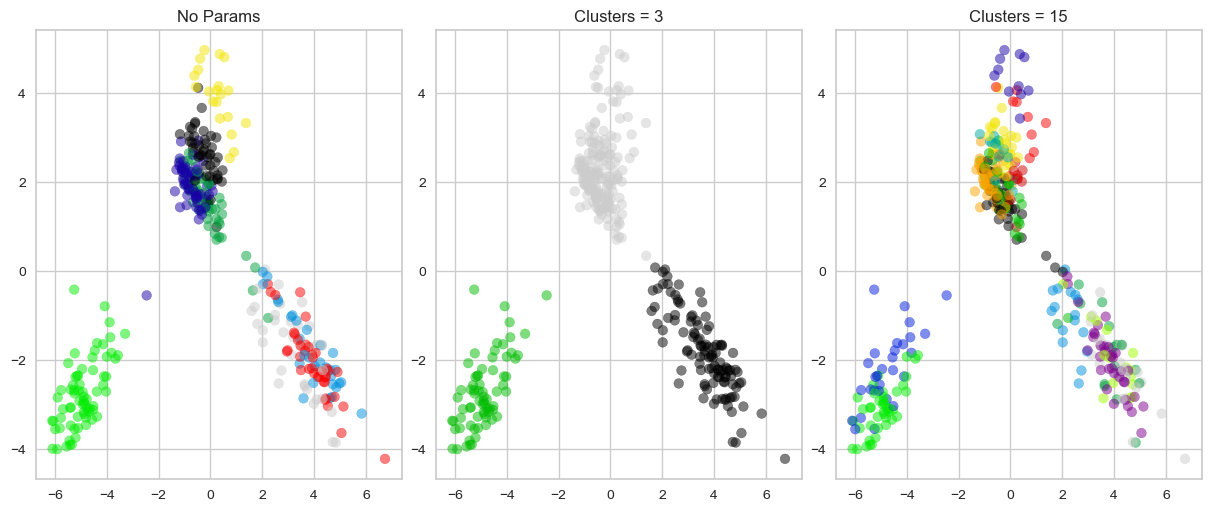

In [115]:
#kmeans
fig, axs = plt.subplots(1, 3, constrained_layout=True)
plt.rcParams['figure.figsize'] = [12, 5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(derm_new_data)

reducer = PCA() # arbitrary for this demo
embedding = reducer.fit_transform(scaled_data)
x_vals = embedding[:, 0]
y_vals = embedding[:, 1]

param_names = ['No Params', 'Clusters = 3', 'Clusters = 15']
cluster_models = [
    KMeans(),
    KMeans(n_clusters=3),
    KMeans(n_clusters=15)
]

for i in range(3):
    labels = cluster_models[i].fit_predict(embedding)
    
    axs[i].scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(param_names[i])

In [ ]:
#Brief Response
#1. The preprocessing techniques required included data loading, separating the target column, and other preprocessing methods including NA removal, scaling, and encoding. I knew to remove NA values because the age column had "?" values. Scaling was required because the data needed to be reshaped to include the cleaned data. 
#2. The regression technique, specifically Support Vector, was best able to predict its respective target, evident in the near zero error. 
#3. The distance between each points represents the difference in conditions based on various clinical attributes. As the distance between other points increases, the more distinct each condition is from the other in terms of clinical attributes. 